In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [162]:
train=pd.read_csv('bigdatamart_Train.csv')
test=pd.read_csv('bigdatamart_Test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


It shows we have missing value in Item_Weight and Outlet_Size.

Also, only 5 features are numeric type, rest all are object data type

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In Item_Visibility, minimun value is 0 which is practically not relavant,so we will have to treat it

### Univariate Analysis

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

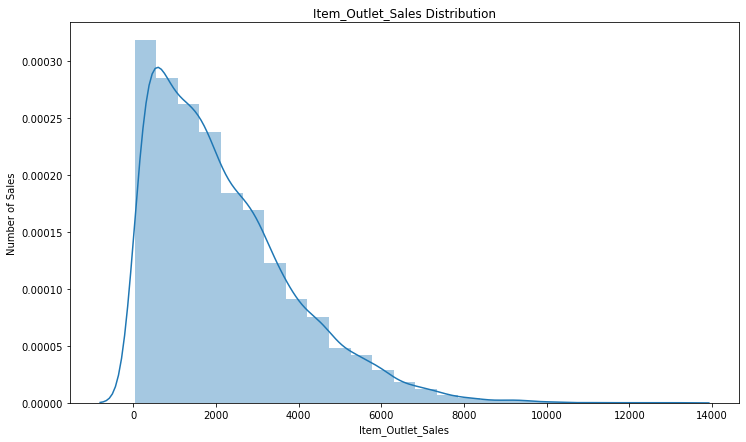

In [7]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

Our target variable is positively skewed 

In [8]:
num_features = train.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

We can see that out of 12 we have only 5 numeric variables.

<AxesSubplot:>

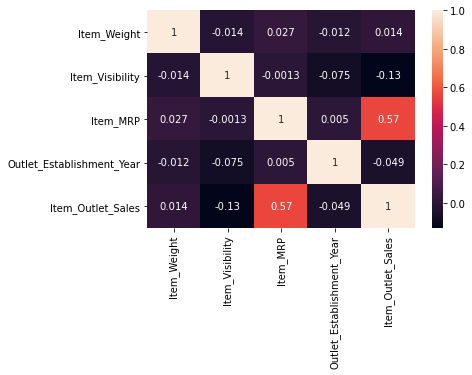

In [9]:
corr=num_features.corr()
sns.heatmap(corr,annot=True)

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable.

In [10]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

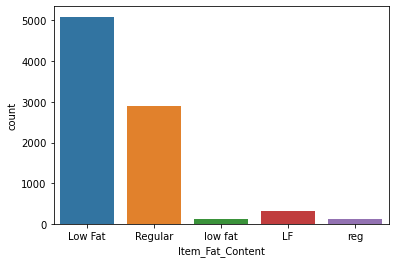

In [11]:
sns.countplot(train.Item_Fat_Content)

Item_Fat_Content there are two possible type “Low Fat” or “Regular”. However, in our data it is written in different manner. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

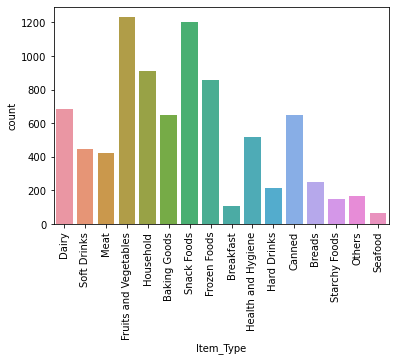

In [14]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

for Item_Type we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

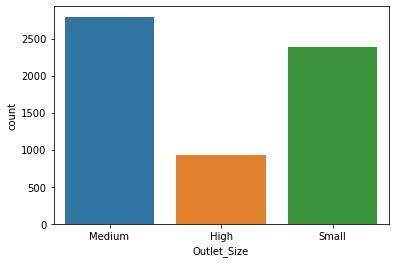

In [15]:
sns.countplot(train.Outlet_Size)

There seems to be less number of stores with size equals to “High”.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

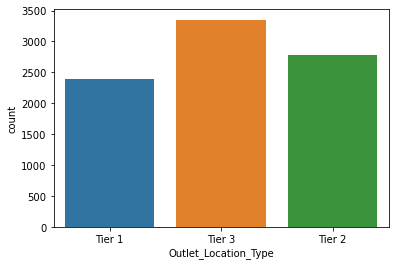

In [16]:
sns.countplot(train.Outlet_Location_Type)

There are more outlets in Tier3 location than Tier1 and Tier2

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

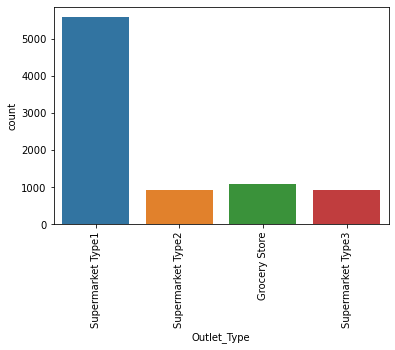

In [17]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

There seems like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low numbers of stores

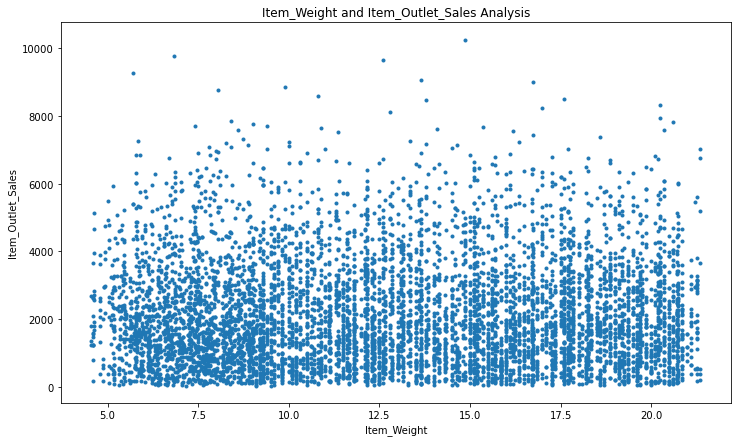

In [20]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.')

Item_Weight had a low correlation with our target variable

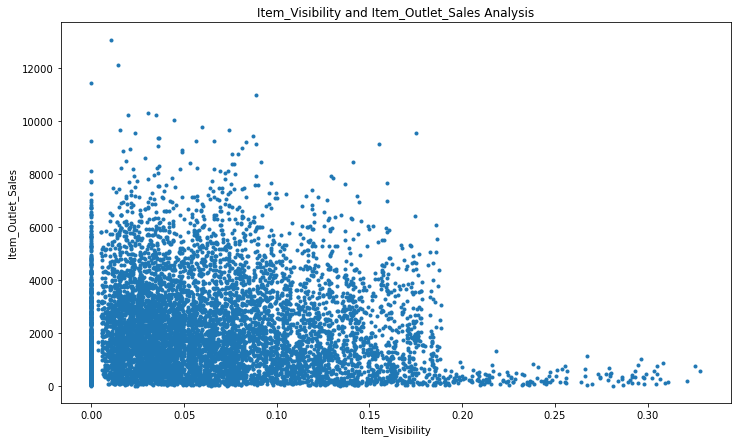

In [21]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.')

This behaviour is not expected as with increase in visibility sales should also increase

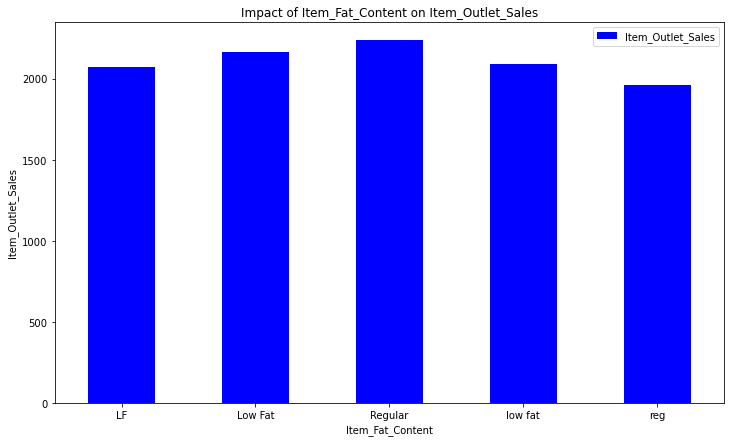

In [25]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales")
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat products seem to higher sales than the Regular products

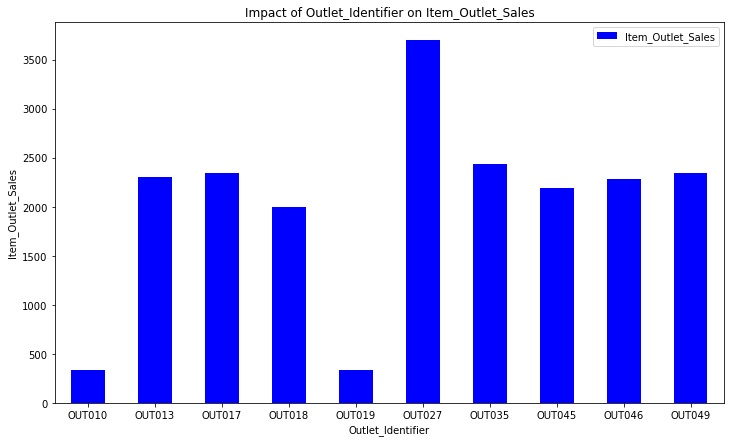

In [26]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales")
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Grocery storehave comparatively less sales than others

In [28]:
train.pivot_table(values='Outlet_Type',
                  columns='Outlet_Identifier',
                  aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


Out of 10- There are 2 Groceries strore, 6 Supermarket Type1, 1Supermarket Type2, and 1 Supermarket Type3. 

In [29]:
train.pivot_table(values='Outlet_Type',
                  columns='Outlet_Size',
                  aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


Most of the stores are of Supermarket Type1 of size High and they do not have best results. whereas Supermarket Type3 (OUT027) is a Medium size store and have best results.

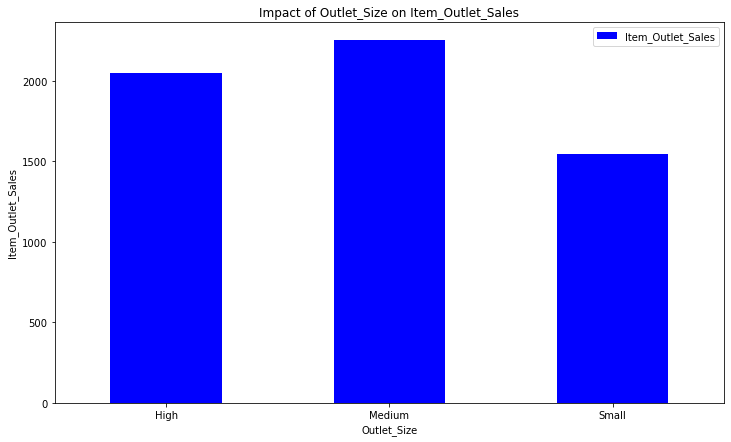

In [30]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Medium sized outlets have more sales as compared to high SIzed outlets

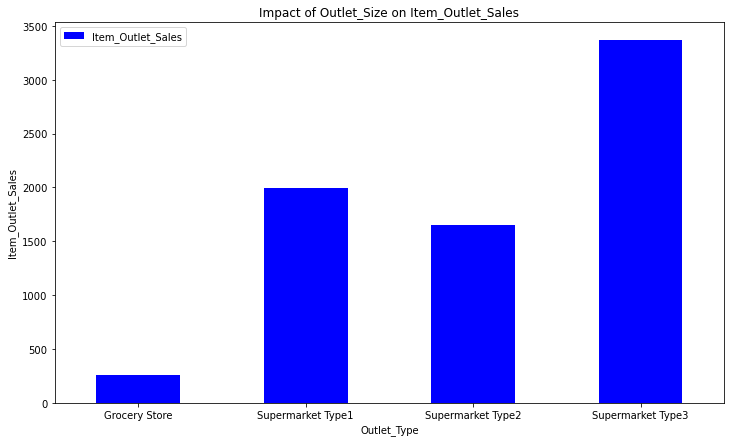

In [31]:
Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

As seen above Grocery Store has least Sales while Supermarket Type 3 is performing exceptionally

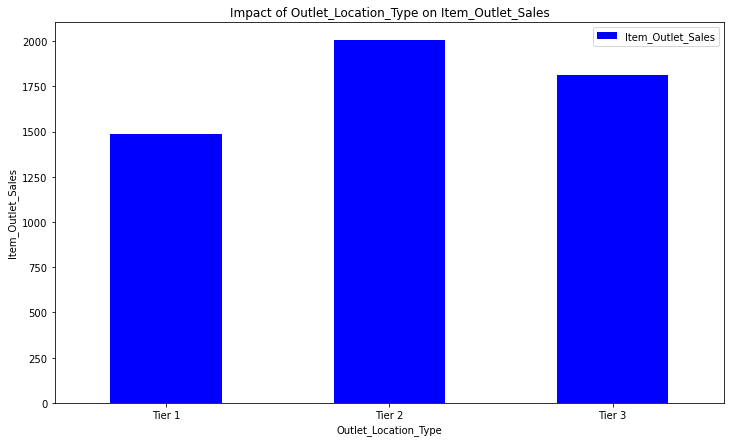

In [32]:
Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Tier 2 cities have the higher sales than the Tier 1 and Tier 3.`

In [163]:
# Join Train and Test Dataset

#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [164]:
#Checking for null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

 Item_Outlet_Sales is the target variable and contains missing values because our test data does not have the Item_Outlet_Sales column.

In [165]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

<AxesSubplot:>

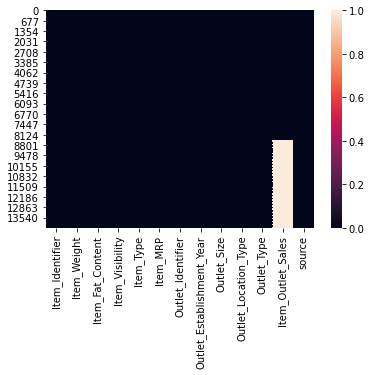

In [166]:
sns.heatmap(data.isnull())

Now there are no null values in our training dataset

In [167]:
#Treating Item_Visibility as it contains 0 value
missing_values = (data['Item_Visibility'] == 0)
print(sum(missing_values))

879


In [168]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,np.nan)

In [169]:
data['Item_Visibility'].isnull().sum()

879

In [170]:
data['Item_Visibility'].fillna(data['Item_Visibility'].mean(),inplace=True)

As, number of years since establishment is more relavant for analysis,so we will getno. of years

In [171]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']

In [172]:
#Grouping the item_identifier as Food,Drinks and Non-Consumable
data['Item_Identifier'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Combined'] = data['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable',                                                            
              'DR':'Drinks'})

In [173]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [174]:
#Treating the Item_Fat_Content Label
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

print(data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [175]:
#As we have one more category as non-consumable,So we will label such items under non-edible tag
data.loc[data['Item_Type_Combined'] == 
"Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [176]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Type_Combined            object
dtype: object

In [177]:
#One Hot EnCoding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [178]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Years                           int64
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Non-Edible            uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_

In [179]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [180]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [181]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [182]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FD,9.30,0.016047,249.8092,3735.1380,10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DR,5.92,0.019278,48.2692,443.4228,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FD,17.50,0.016760,141.6180,2097.2700,10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FD,19.20,0.070303,182.0950,732.3800,11,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NC,8.93,0.070303,53.8614,994.7052,22,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [196]:
x=train.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y=train[['Item_Outlet_Sales']]

In [197]:
#Checking the skewness
x.skew()

Item_Weight                          0.098453
Item_Visibility                      1.271950
Item_MRP                             0.127202
Outlet_Years                         0.396641
Item_Fat_Content_Low Fat             0.161766
Item_Fat_Content_Non-Edible          1.600639
Item_Fat_Content_Regular             0.616705
Outlet_Location_Type_Tier 1          0.979119
Outlet_Location_Type_Tier 2          0.738834
Outlet_Location_Type_Tier 3          0.437995
Outlet_Size_High                     2.503964
Outlet_Size_Medium                  -0.453138
Outlet_Size_Small                    0.979119
Outlet_Type_Grocery Store            2.239897
Outlet_Type_Supermarket Type1       -0.649203
Outlet_Type_Supermarket Type2        2.511707
Outlet_Type_Supermarket Type3        2.498184
Item_Type_Combined_Drinks            2.788057
Item_Type_Combined_Food             -0.972654
Item_Type_Combined_Non-Consumable    1.600639
Outlet_Identifier_OUT010             3.525732
Outlet_Identifier_OUT013          

In [198]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
         x[i]=np.square(x[i])

x.skew()   

Item_Weight                          0.098453
Item_Visibility                      0.102356
Item_MRP                             0.127202
Outlet_Years                         0.396641
Item_Fat_Content_Low Fat             0.161766
Item_Fat_Content_Non-Edible          1.599609
Item_Fat_Content_Regular             0.615723
Outlet_Location_Type_Tier 1          0.978516
Outlet_Location_Type_Tier 2          0.737793
Outlet_Location_Type_Tier 3          0.437995
Outlet_Size_High                     2.503906
Outlet_Size_Medium                  -0.453138
Outlet_Size_Small                    0.978516
Outlet_Type_Grocery Store            2.238281
Outlet_Type_Supermarket Type1       -0.649203
Outlet_Type_Supermarket Type2        2.511719
Outlet_Type_Supermarket Type3        2.498047
Item_Type_Combined_Drinks            2.787109
Item_Type_Combined_Food             -0.972654
Item_Type_Combined_Non-Consumable    1.599609
Outlet_Identifier_OUT010             3.525391
Outlet_Identifier_OUT013          

In [199]:
#lets bring all features to a common scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_=mm.fit_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)
x_

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,0.184967,0.927507,0.416667,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,0.214583,0.072068,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.191821,0.468288,0.416667,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,0.483825,0.640093,0.458333,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.483825,0.095805,0.916667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.431012,0.777729,0.916667,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,0.227746,0.387206,0.326263,0.291667,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,0.359929,0.325473,0.228492,0.208333,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8521,0.158083,0.694064,0.304939,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Evaluation

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [205]:
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=.30,random_state=42)

In [208]:
model=[KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

KNeighborsRegressor()
0.6807571874107463
error: 
Mean absolute error:  828.1196965506455
Mean squared error:  1409333.676720097
Root mean squared error:  1187.1536028333053
r2_score 0.49684507909316566



RandomForestRegressor()
0.9375641562630423
error: 
Mean absolute error:  775.5133231200626
Mean squared error:  1245963.6220552574
Root mean squared error:  1116.227406067087
r2_score 0.5551708313910426



LinearRegression()
0.5600892332959722
error: 
Mean absolute error:  809.2208007821666
Mean squared error:  1205933.4624068732
Root mean squared error:  1098.1500181700465
r2_score 0.5694622459399699





In [209]:
#Checking the cross val score
from sklearn.model_selection import cross_val_score
for m in model:
    for j in range(2,10):
        cv_score=cross_val_score(m,x_,y,cv=j)
        cv_mean=cv_score.mean()
        print(m)
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print("\n")

KNeighborsRegressor()
At cross fold 2 the cv score is 0.50598174655811


KNeighborsRegressor()
At cross fold 3 the cv score is 0.5156026520286003


KNeighborsRegressor()
At cross fold 4 the cv score is 0.5095499646803878


KNeighborsRegressor()
At cross fold 5 the cv score is 0.5091048210372711


KNeighborsRegressor()
At cross fold 6 the cv score is 0.5149579975439421


KNeighborsRegressor()
At cross fold 7 the cv score is 0.512419898034895


KNeighborsRegressor()
At cross fold 8 the cv score is 0.5144616820303909


KNeighborsRegressor()
At cross fold 9 the cv score is 0.5119488180859674


RandomForestRegressor()
At cross fold 2 the cv score is 0.5454792500830202


RandomForestRegressor()
At cross fold 3 the cv score is 0.546973790550705


RandomForestRegressor()
At cross fold 4 the cv score is 0.5476597846777576


RandomForestRegressor()
At cross fold 5 the cv score is 0.5471290040771815


RandomForestRegressor()
At cross fold 6 the cv score is 0.5524344259023896


RandomForestRegress

### Regularization

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [211]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.5698498446047839
error: 
Mean absolute error:  808.7048217304886
Mean squared error:  1204847.8010555152
Root mean squared error:  1097.6555930962659


In [212]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.5605378412556032

### Hyper-Parameter Tuning

In [214]:
from sklearn.model_selection import RandomizedSearchCV

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'mse'}


In [215]:
rf=RandomForestRegressor(criterion="mse",max_features="auto",n_estimators=500,max_depth=6)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))
rfscore=cross_val_score(rf,x,y,cv=9)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

R2 Score: 59.94939068845706
error: 
Mean absolute error:  736.6709974244768
Mean squared error:  1121814.9744851335
Root mean squared error:  1059.1576721551583
Cross val score: 59.575849680820305


After hyper parameter tuning, we can see random forest has least difference between r2_score and cross val score. Also in terms of error, Random Forest have least MAE and RMSE.
So, Random Forest Regressor is our best Model

### Prediction for Test Data

In [218]:
test.drop('Item_Identifier',axis=1,inplace=True)

In [219]:
pred=rf.predict(test)

In [220]:
df=pd.DataFrame(pred)
df.to_csv('sales_submission.csv')

In [221]:
df

,0
0,4855.791232
1,4828.061594
2,531.565679
3,4845.011427
4,5987.228178
...,...
5676,4850.260111
5677,4521.824636
5678,4930.910490
5679,4821.552733


### Saving the model

In [222]:
import joblib
joblib.dump(rf,'sales.obj')

['sales.obj']